# 导入包及模块

In [12]:
import torch
import torchvision
import numpy as np
import sys
import torchvision.transforms as transforms

获取和读取数据

In [13]:
#获取数据集
mnist_train = torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST', train=True, download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST', train=False, download=True, transform=transforms.ToTensor())
#读取数据集
batchSize=256
trainIter=torch.utils.data.DataLoader(mnist_train,batch_size=batchSize,shuffle=True,num_workers=8)
testIter=torch.utils.data.DataLoader(mnist_test,batch_size=batchSize,shuffle=True,num_workers=8)

# 初始化模型参数

In [14]:
numInputs = 784
numOutputs = 10

w=torch.tensor(np.random.normal(0,0.01,(numInputs,numOutputs)),requires_grad=True,dtype=torch.float)
b=torch.tensor(numOutputs,dtype=torch.float,requires_grad=True)

# 实现softmax计算

In [15]:
def softmax(x):
    x=x.exp()
    #keepdim=True 不会删除sum为1的维度
    return x / torch.sum(x,dim=1,keepdim=True)

In [16]:
x=torch.randn(2,5)
print(x)
print(softmax(x))

tensor([[ 0.4411, -0.2897, -2.2059, -0.2722,  0.0423],
        [-1.6530,  0.4162,  1.1570,  0.5952,  0.6630]])
tensor([[0.3685, 0.1774, 0.0261, 0.1806, 0.2473],
        [0.0222, 0.1754, 0.3680, 0.2098, 0.2245]])


# 定义模型

In [17]:
def net(x):
    return softmax(torch.mm(x.view(-1,numInputs),w)+b)

# 定义优化算法

In [18]:
def sgd(params,lr,batchSize):
    for param in params:
        param.data -= lr*param.grad / batchSize

# 定义交叉熵损失函数

In [19]:
def crossEntropy(yP,y):
    return - torch.log(yP.gather(1,y.view(-1,1)))

# 计算分类准确率

In [20]:
def accuracy(yP,y):
    return (yP.argmax(dim=1)==y).float().mean().item()

def evaluateAccuary(dataIter,net):
    accSum=0
    n=0
    for x,y in dataIter:
        accSum+=(net(x).argmax(dim=1)==y).float().sum().item()
        n+=y.shape[0]
    return accSum/n

# 训练模型

In [21]:
epochsNum=5
lr=0.1
loss=crossEntropy

for epoch in range(epochsNum):
    train_l_sum=0
    n=0
    for x,y in trainIter:
        yP=net(x)
        l=loss(yP,y).sum()
        l.backward()
        sgd([w,b],lr,batchSize)
        w.grad.data.zero_()
        b.grad.data.zero_()
        train_l_sum+=l
        n+=y.shape[0]
    print(epoch,train_l_sum.item()/n,evaluateAccuary(testIter,net))

0 0.7956919270833334 0.7891
1 0.5840093098958333 0.8066
2 0.5408682291666667 0.8164
3 0.51695341796875 0.8198
4 0.5021496419270833 0.8237


# 展示分类准确率

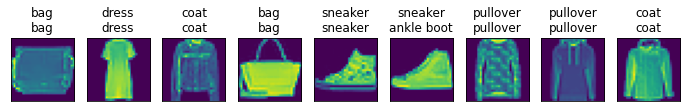

In [22]:
#获取标签
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

import matplotlib.pyplot as plt
#画图
def show_fashion_mnist(images,labels):
    figs,ax = plt.subplots(1, len(images), figsize=(12, 12))
    for ax, img, lbl in zip(ax, images, labels):
        ax.imshow(img.view((28, 28)).numpy())
        ax.set_title(lbl)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
    plt.show()
#预测图片
x, y = iter(testIter).next()
true_labels = get_fashion_mnist_labels(y)
pred_labels = get_fashion_mnist_labels(net(x).argmax(dim=1))
titles = [true + '\n' + pred for true, pred in zip(true_labels, pred_labels)]
show_fashion_mnist(x[0:9], titles[0:9])
